We are going to train a model that can predict wether a child has Kyphosis after their spinal surgery. We will be using a single decision tree and random forests. 

## Import Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

## Get the Data
Now we import the data from the CSV file into a dataframe. The attributes of our set are the Age of the child (in months), the Number (of vertebrae) and the Start (top vertebra) operated on.

In [82]:
#Firstly we import our data and convert it into a dataframe using panda librairy, then we store it in a variable called df
df = pd.read_csv('kyphosis.csv')

In [83]:
#The head() function allow us to have a first idea of our dataframe by plotting the first lines
#We can see that the Kyphosis variables are categorical so will have to convert them in the rest of our analysis
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [84]:
#We obtain the information from the dataframe 
#From this function we can say that this dataframe is composed of 3 int64 variables and one variable of object type
#Also there are 81 individuals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [116]:
df.Kyphosis.value_counts()
df.describe()
#from this line of code we just want to see how many patients have Kyphosis or not
#we get 17 patients with Kyphosis out of 81

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## Exploratory Data Analysis (EDA)

We'll just check out a simple pairplot for this small dataset.

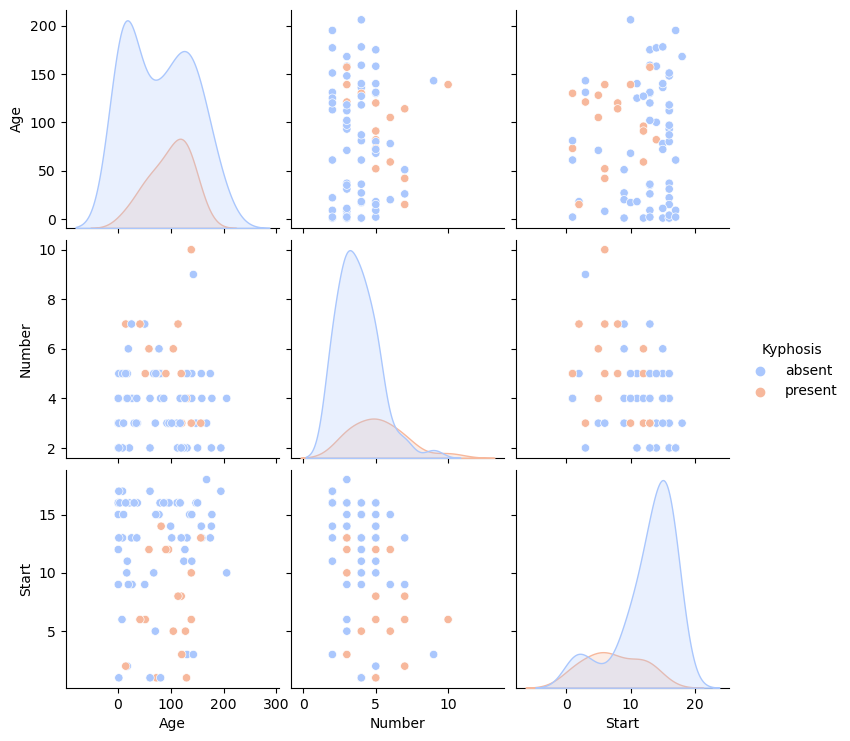

In [86]:
sns.pairplot(df, hue='Kyphosis',palette='coolwarm')
#To get an idea of how the variables correlate together we print pairplot

## Train Test Split

Let's split up the data into a training set and a test set.

In [87]:
from sklearn.model_selection import train_test_split

In [117]:
#We are going to convert categorical features to numeric, we will select the Kyphosis column  
#and we will remove it of our dataframe. Then we add this new integer column at the end of the dataframe
cat_feats = ['Kyphosis']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               81 non-null     int64
 1   Number            81 non-null     int64
 2   Start             81 non-null     int64
 3   Kyphosis_present  81 non-null     uint8
dtypes: int64(3), uint8(1)
memory usage: 2.1 KB


In [89]:
# we define columns that are inputs and outputs
X = df.drop('Kyphosis',axis=1)
#Kyphosis will be determinated as the output
y = df['Kyphosis']
#Hyphosis column is stored and will be used to determine precision of the model 
#We take randomly 70% of our dataset to train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Decision Trees

We'll start just by training a single decision tree.

Now we choose from sklearn.tree the decision tree classifier model

In [90]:
from sklearn.tree import DecisionTreeClassifier

Create a model clalled dtree 

In [91]:
dtree = DecisionTreeClassifier()
#We create the model

Fit the model to the training data

In [92]:
dtree.fit(X_train,y_train)
#We train the model on the trainset data

DecisionTreeClassifier()

## Prediction and Evaluation 

Let us evaluate now, how well our decision tree model is able to predict based on the attributes (Age, Number, Start), whether or not Kyphosis is present at the child or not.

In [93]:
#we do the prediction on our testset using multiple inputs such as Age, Number, Start to predict if according to the model the child has Kyphosis or not
predictions = dtree.predict(X_test)
#From our model we predict values of the X_test dataset

sklearn.metrics provides the function confusion_matrix that compares the predicted values with the actual lable values, and outputs the confusion_matrix.

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
#we will firstly print our confusion matrix to evaluate the accuracy of a classification
#we don't get the same values because we are not working on the same seed
print(confusion_matrix(y_test,predictions))
#We will obtain numbers of true positives / false negatives ....

[[12  5]
 [ 6  2]]


Similarly, sklearn.metrics provides the function classification_report that outputs the main classification metrics: such as precision, recall, f1-score, accuracy, etc. You can read more about it in the sklearn documantation here https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [96]:
#let's now print the classification report :
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

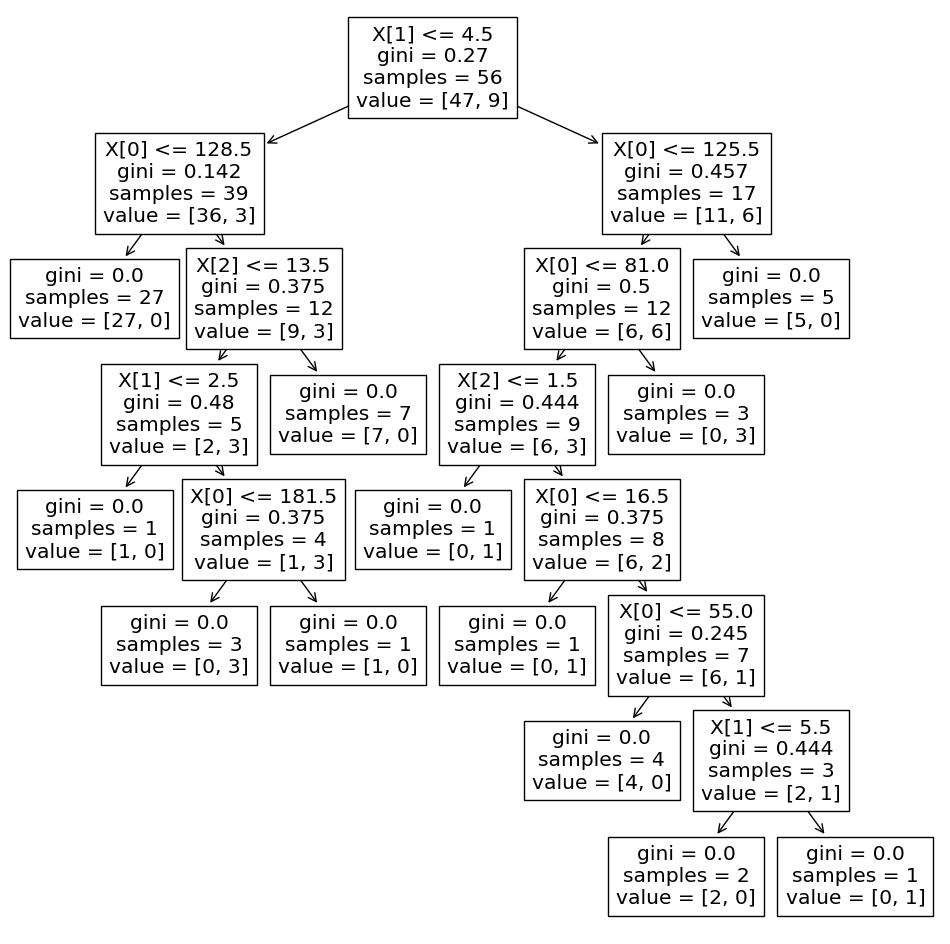

In [97]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))  # whatever size you want
tree.plot_tree(dtree, ax=ax)
plt.show()
#to get a visual representation of the tree

In [115]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

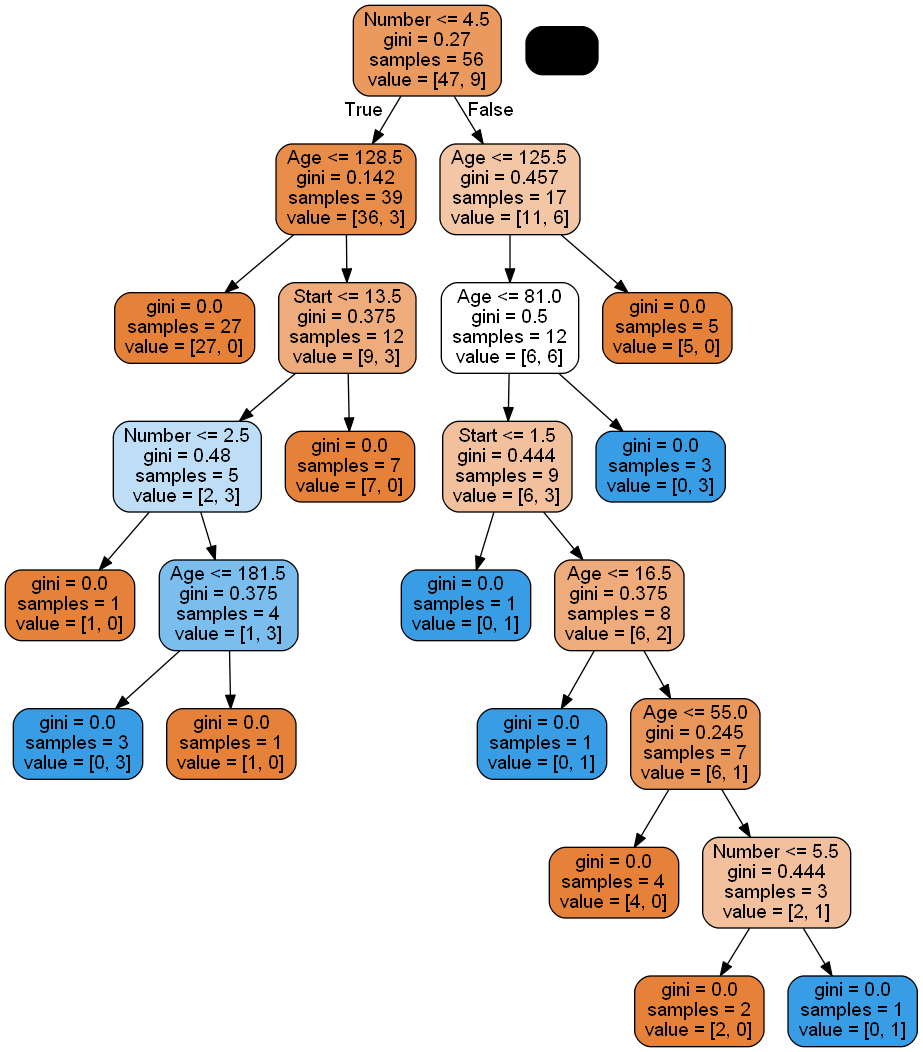

In [103]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  
#we visualize a more representative tree

## Random Forests

#### Now let's compare the decision tree model to a random forest.
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement. You can read more about it here https://scikit-learn.org/stable/modules/ensemble.html#forest

From sklearn.ensemble, choose the Random Forest classifier. Note that, this classifier is under ensemble, since it builds an emsemble of trees, so it falls under the category of ensemble learning. 

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
#We apply the random forest and indicate the hyper parameters to modify

In [111]:
rfc.fit(X_train,y_train)
#We train the model on the trainset data

RandomForestClassifier(n_estimators=200)

In [112]:
predictions_r = rfc.predict(X_test)
print(confusion_matrix(y_test,predictions_r))
#Same as before we print confusion matrix and classification report to evaluate the performance of our model

[[17  0]
 [ 6  2]]


In [113]:
print(classification_report(y_test,predictions_r))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



### we can see that we obtain a better accuracy (0,76) with the random forest model